# How to combine multiple independent posterior density distributions


## Product
We approximate distributions of a parameter $\theta$ for all $k = 22$ chromosomes.
For the $i$th chromosome, which has a chromosome length $\mathcal{l}_i$, we simulate a $\theta$ value $n$ times (and perform ABC) in order to obtain the posterior $\pi_i(\theta \vert \mathcal{D})$. Because we use ABC to approximate the posterior, we do not calculate the likelihood analytically (and is not output by ABCestimator). We recover the likelihood of each chromosome from the posterior devided by the prior,

$$f_i (\mathcal{D}\vert \theta) = \dfrac{\pi_i(\theta\vert \mathcal{D})}{\pi(\theta)}.$$

The combined posterior $\Pi(\theta)$ is given by the normalized product of the chromosome likelihoods,

$$\Pi(\theta) = c\prod_{i=1}^k f_i (\mathcal{D}\vert \theta)$$

Where,

To combine the posteriors:  
- devide the posterior densities by the prior density  
- multiply the likelihoods
- normalize

## Mixture
We approximate distributions of a parameter $\theta$ for all $k = 22$ chromosomes.
For the $i$th chromosome, which has a chromosome length $\mathcal{l}_i$, we simulate a $\theta$ value $n$ times (and perform ABC) in order to obtain the posterior $\pi_i(\theta)$. The combined posterior $\Pi(\theta)$ is given by

$$\Pi(\theta) = \frac{1}{Z}\sum_{i=1}^k \pi_i(\theta)l_i$$

Where,
$$Z = \int\ \sum_{i=1}^k\pi_i(\theta)l_i d\theta.$$

To combine the posteriors:  
- weight the densities by the amount of data,
- add the weigted densities across the sets together,
- nomalize so sum over densities equals 1, by deviding the summed, weigted densities by the sum of all the weighted densities

## 1. Create fake posteriors

In [3]:
import random
from random import shuffle
import pandas as pd
from ggplot import *

/Users/agladsteinNew/dev/envs/pandas_env/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


/Users/agladsteinNew/dev/envs/pandas_env/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/agladsteinNew/dev/envs/pandas_env/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
def create_densities():
    current_max = 0.5
    probabilities = []
    for i in range(9):
        probabilities.append(random.uniform(0,current_max))
        current_max = current_max - probabilities[-1]
    probabilities.append(1-sum(probabilities))
    shuffle(probabilities)
    return probabilities

posterior_df = pd.DataFrame()
for chrom in range(3):
    probabilities = create_densities()
    posterior_df['theta_'+str(chrom)] = probabilities
posterior_df['bin'] = posterior_df.index
posterior_df.head()

,theta_0,theta_1,theta_2,bin
0,0.010479,0.000090,0.191635,0
1,0.000381,0.000075,0.000559,1
2,0.500085,0.007538,0.002791,2
3,0.474902,0.500017,0.048394,3
4,0.000132,0.000246,0.500105,4


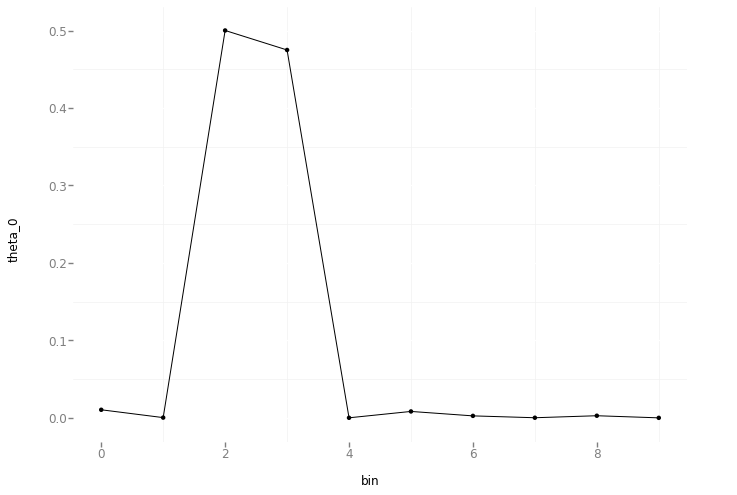

<ggplot: (281368069)>


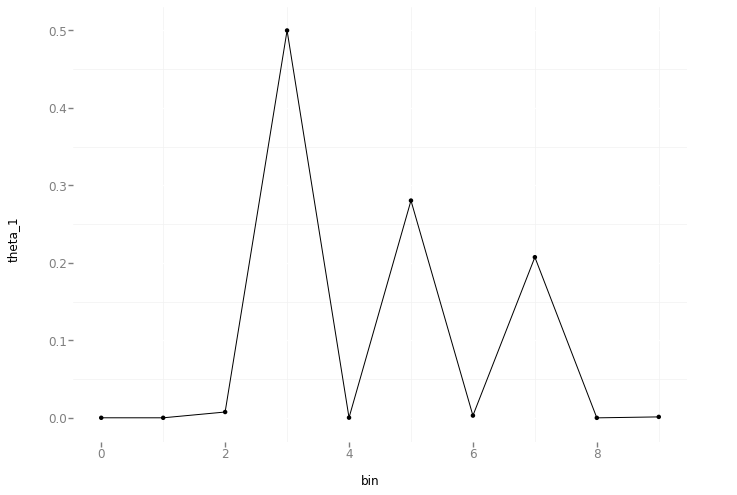

<ggplot: (286769045)>


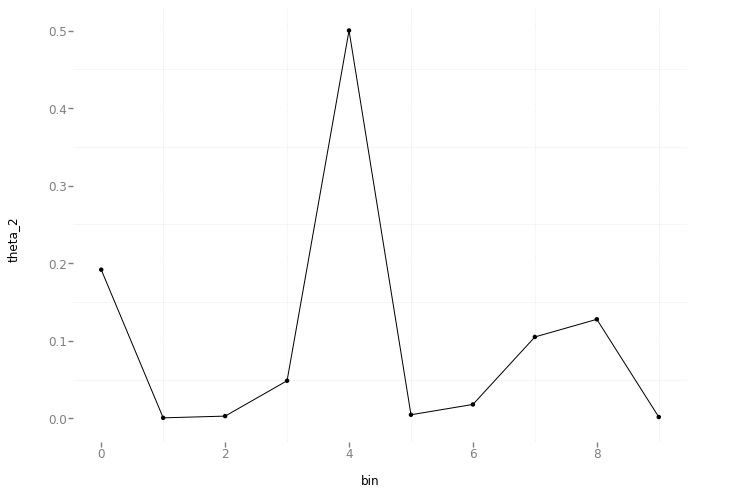

<ggplot: (286953481)>


In [5]:
for chrom in range(3):
    plot = ggplot(aes(x = 'bin', y = 'theta_'+str(chrom)), data = posterior_df) + \
        geom_point() + \
        geom_line() + \
        theme_bw()
    print(plot)

## 2. Combine probability densities

### Product
- devide the posterior densities by the prior density  
- multiply the likelihoods
- normalize

In [17]:
lengths = [300, 200, 100]

prior = 1/float(len(posterior_df.index))

likelihood_df = pd.DataFrame()
for chrom in range(3):
    likelihood_df['likelihood_'+str(chrom)] = posterior_df['theta_'+str(chrom)] / prior

likelihood_df['product'] = likelihood_df.product(axis = 1)
total = likelihood_df['product'].sum()
likelihood_df['normalized'] = likelihood_df['product'] / total
likelihood_df['bin'] = likelihood_df.index
likelihood_df.head()

,likelihood_0,likelihood_1,likelihood_2,product,normalized,bin
0,0.104794,0.000897,1.916349,1.800593e-04,1.563359e-05,0
1,0.003809,0.000748,0.005590,1.592382e-08,1.382581e-09,1
2,5.000853,0.075384,0.027910,1.052149e-02,9.135253e-04,2
3,4.749025,5.000167,0.483936,1.149150e+01,9.977460e-01,3
4,0.001318,0.002456,5.001049,1.618521e-05,1.405275e-06,4


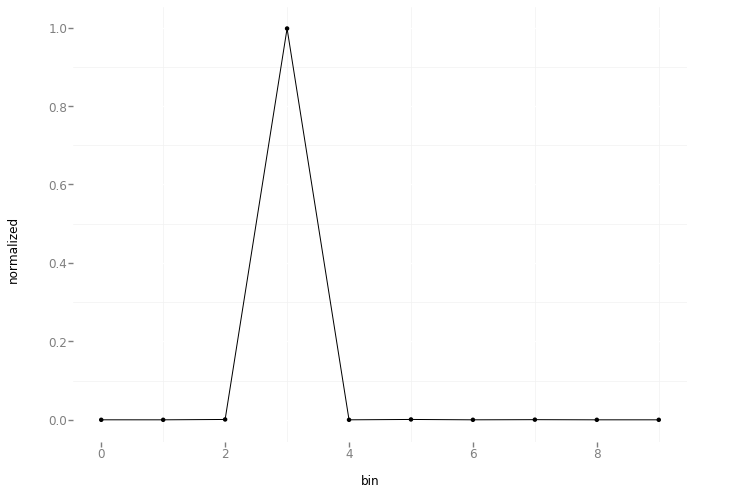

<ggplot: (286955581)>


In [20]:
plot = ggplot(aes(x = 'bin', y = 'normalized'), data = likelihood_df) + \
    geom_point() + \
    geom_line() + \
    theme_bw()
print(plot)

### Mixture
- weight densities by chromosome length
- sum weighted densities across chromosomes
- divide summed weighted chromosome densities by total

In [18]:
lengths = [300, 200, 100]

posterior_weight_df = pd.DataFrame()
for chrom in range(3):
    posterior_weight_df['theta_'+str(chrom)+'_weight'] = posterior_df['theta_'+str(chrom)] * lengths[chrom]

posterior_weight_df['sum'] = posterior_weight_df.sum(axis = 1)
total = posterior_weight_df['sum'].sum()
posterior_weight_df['combined_theta'] = posterior_weight_df['sum'] / total
posterior_weight_df['bin'] = posterior_weight_df.index
posterior_weight_df.head()

,theta_0_weight,theta_1_weight,theta_2_weight,sum,combined_theta,bin
0,3.143821,0.017932,19.163494,22.325247,0.037209,0
1,0.114256,0.014959,0.055903,0.185117,0.000309,1
2,150.025599,1.507677,0.279097,151.812373,0.253021,2
3,142.470741,100.003331,4.839360,247.313432,0.412189,3
4,0.039533,0.049119,50.010489,50.099141,0.083499,4


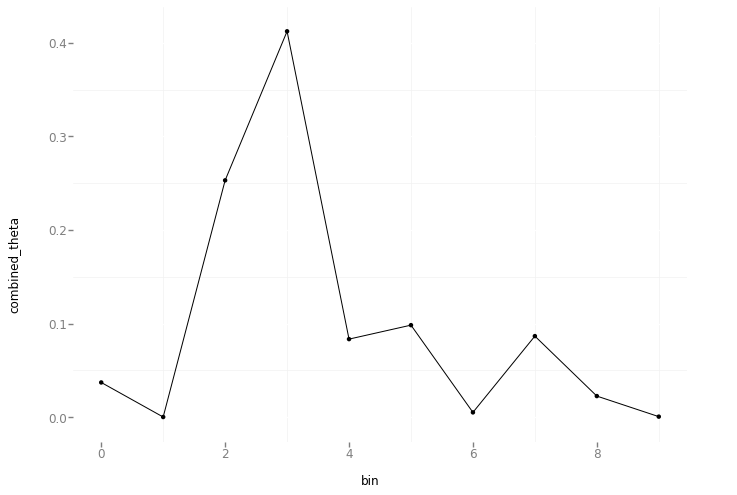

<ggplot: (286953513)>


In [19]:
plot = ggplot(aes(x = 'bin', y = 'combined_theta'), data = posterior_weight_df) + \
    geom_point() + \
    geom_line() + \
    theme_bw()
print(plot)